In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("1976.xlsx")
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1976,17788,363,14,3531
1,1976,17190,305,15,3525
2,1976,17524,225,36,3547
3,1976,17082,160,42,3515
4,1976,17068,385,37,3558
...,...,...,...,...,...
1888,1976,17461,112,19,3522
1889,1976,17888,19,34,3512
1890,1976,17048,144,22,3534
1891,1976,17389,284,39,3567


In [3]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1893, 5)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1893 non-null   int64
 1   Maximum length (m))  1893 non-null   int64
 2   Recession(m),        1893 non-null   int64
 3   Rate/yr(m)           1893 non-null   int64
 4   Snout altitude (m)   1893 non-null   int64
dtypes: int64(5)
memory usage: 74.1 KB


In [5]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [6]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1893


In [7]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [8]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [9]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,0.0227,-0.0231,-0.0157
"Recession(m),",NaN,0.0227,1.0000,0.0033,-0.0090
Rate/yr(m),NaN,-0.0231,0.0033,1.0000,0.0212
Snout altitude (m),NaN,-0.0157,-0.0090,0.0212,1.0000


In [10]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Recession(m),          0.0227
Snout altitude (m)    -0.0157
Rate/yr(m)            -0.0231
Year                      NaN
Name: Maximum length (m)), dtype: float64

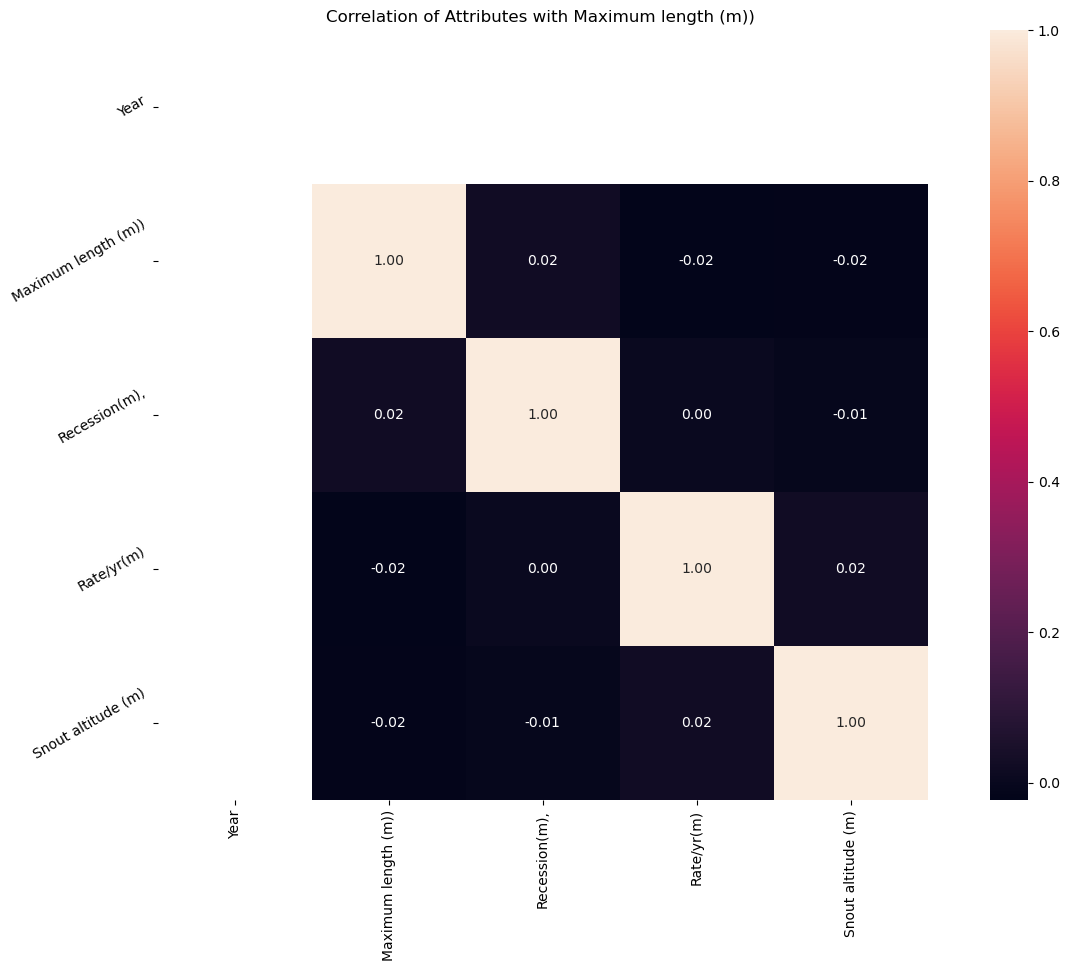

In [11]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [12]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [13]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,893.0000","1,893.0000","1,893.0000","1,893.0000","1,893.0000"
mean,"1,976.0000","17,556.9065",222.3270,27.1865,"3,532.2478"
std,0.0000,300.4643,128.1121,8.6285,20.5473
min,"1,976.0000","17,035.0000",0.0000,13.0000,"3,496.0000"
25%,"1,976.0000","17,302.0000",111.0000,20.0000,"3,514.0000"
50%,"1,976.0000","17,562.0000",221.0000,27.0000,"3,533.0000"
75%,"1,976.0000","17,819.0000",335.0000,35.0000,"3,550.0000"
max,"1,976.0000","18,067.0000",440.0000,42.0000,"3,567.0000"


In [14]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

Year
1976   1.0000
Name: count, dtype: float64

Recession(m),
134   0.0063
169   0.0058
439   0.0053
103   0.0053
386   0.0053
       ...  
136   0.0005
190   0.0005
159   0.0005
3     0.0005
20    0.0005
Name: count, Length: 438, dtype: float64

Rate/yr(m)
17   0.0423
37   0.0386
30   0.0380
14   0.0375
36   0.0375
28   0.0370
23   0.0365
32   0.0365
21   0.0359
13   0.0354
16   0.0349
24   0.0343
40   0.0338
15   0.0333
26   0.0328
34   0.0328
39   0.0328
29   0.0328
22   0.0328
31   0.0322
38   0.0317
20   0.0317
18   0.0312
42   0.0306
27   0.0301
19   0.0296
35   0.0291
25   0.0285
33   0.0280
41   0.0222
Name: count, dtype: float64

Snout altitude (m)
3508   0.0222
3542   0.0211
3502   0.0185
3509   0.0180
3558   0.0174
        ...  
3545   0.0100
3511   0.0095
3518   0.0085
3564   0.0063
3496   0.0005
Name: count, Length: 72, dtype: float64



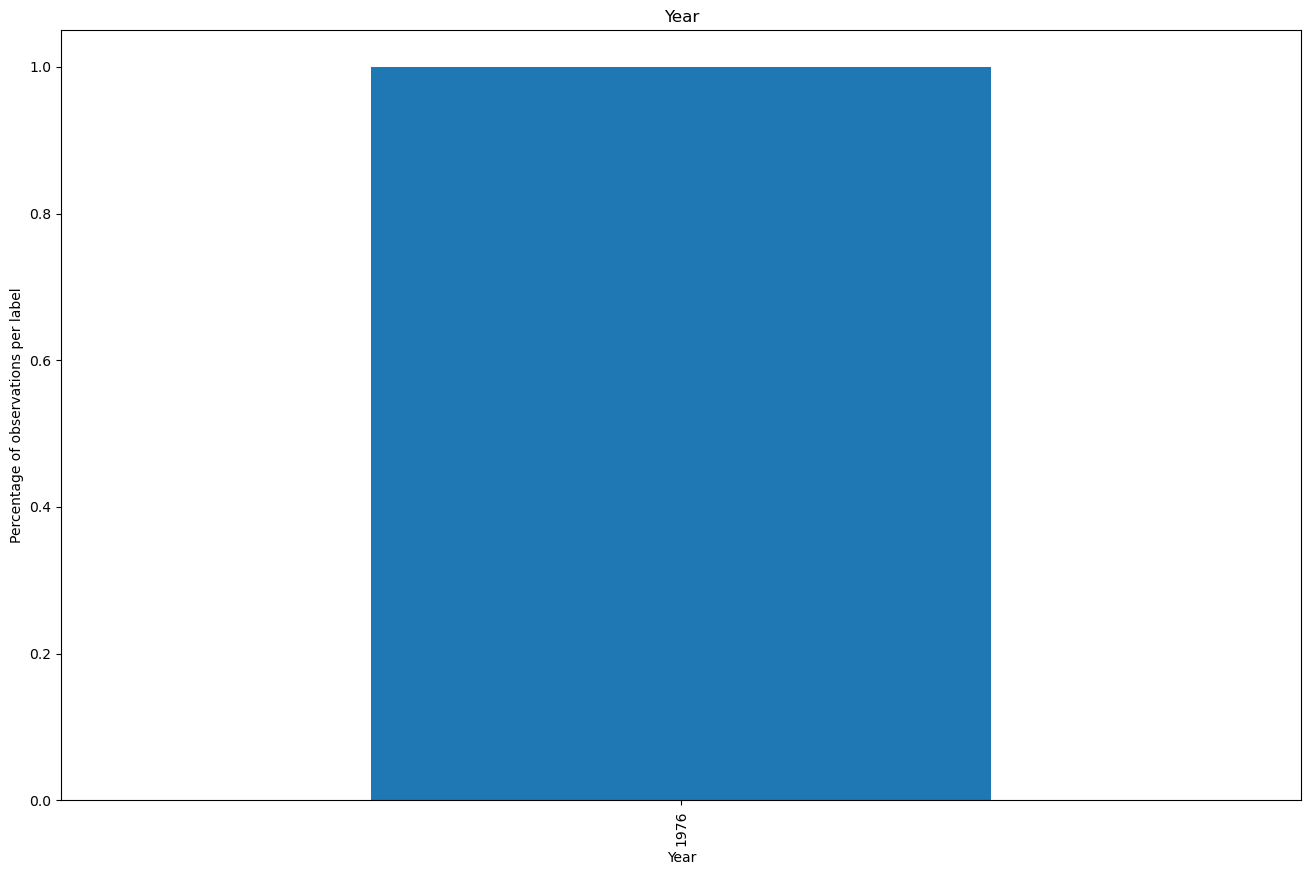

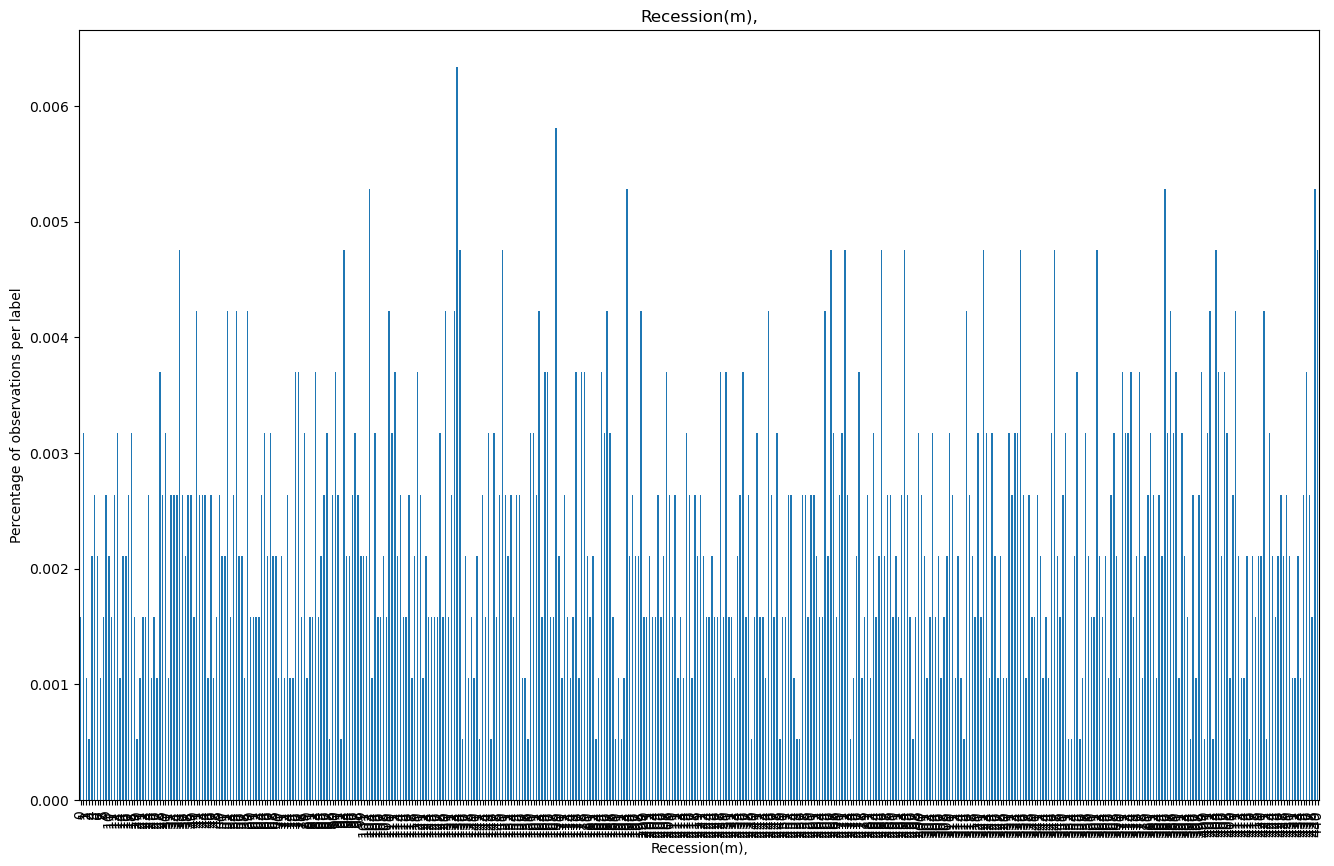

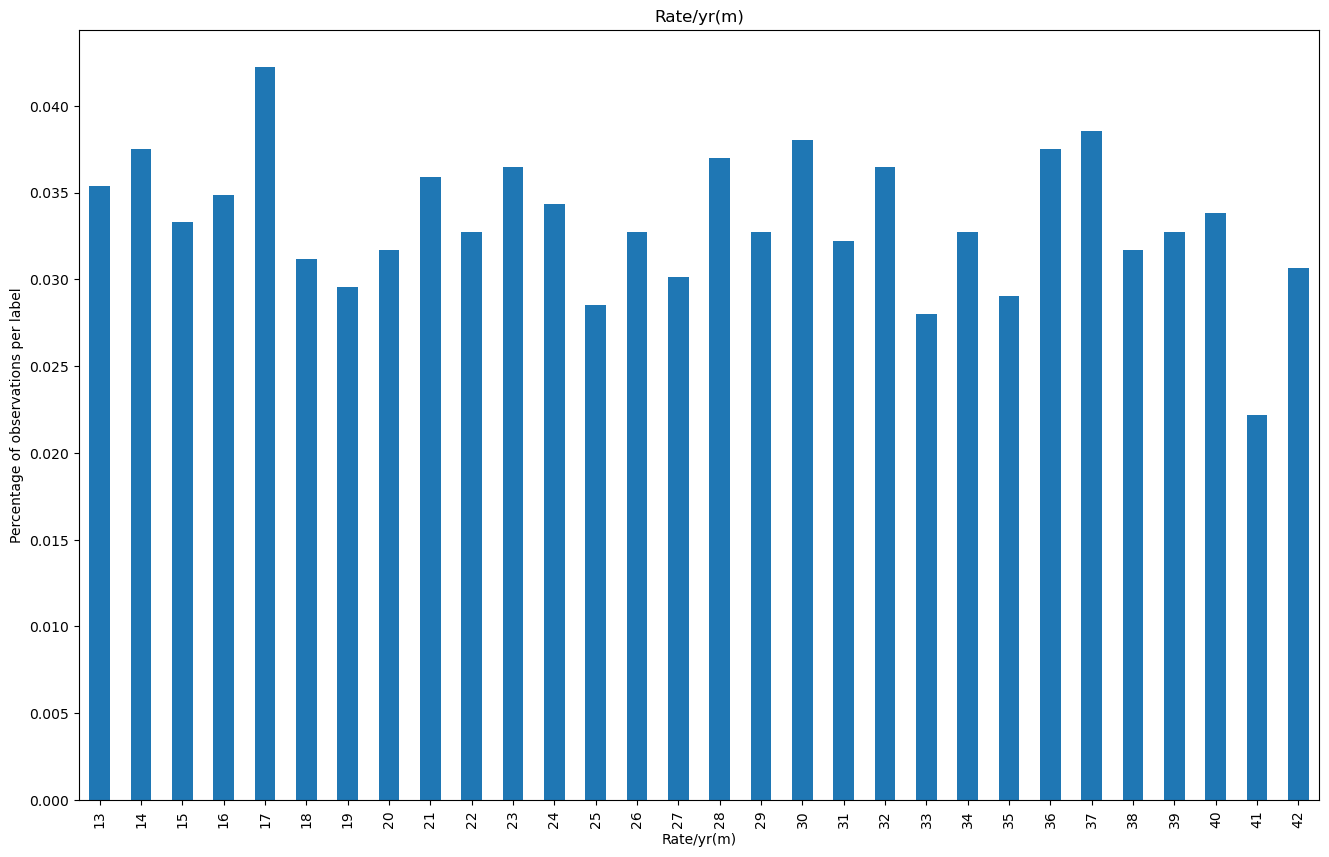

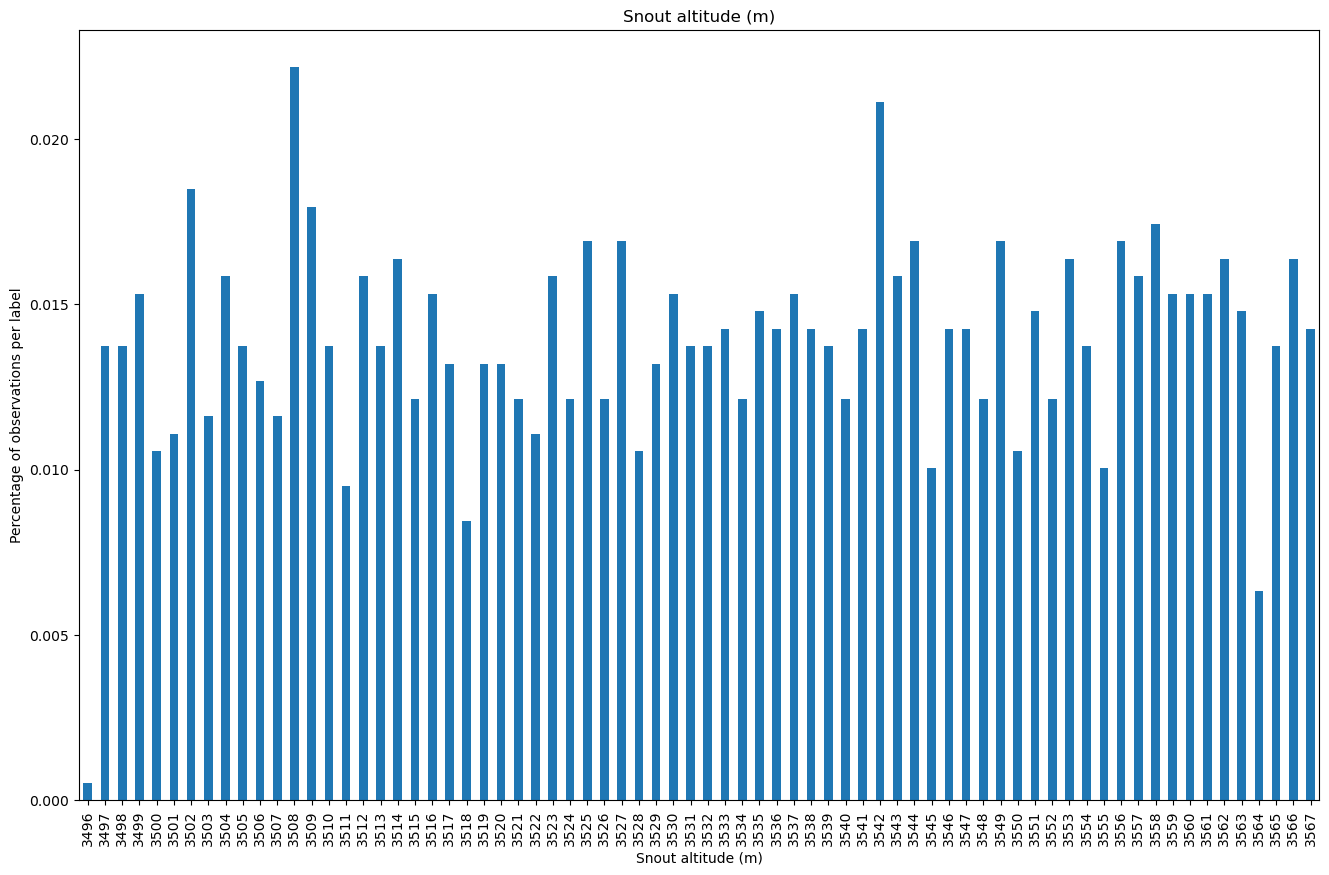

In [15]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()